# Project Name- SYRIATEL CUSTOMER CHURN

# 1. Business Understanding

### 1.1 Business Overview

SyriaTel is a communications company that offers mobile and communications services to it's customers. Customer churn refers to a situation where customers stop using company's products or services over a given period. In the telecommunications industry, this often means customers cancel their mobile, internet, or bundled service subscriptions and switch to a competitor.
The business goal is to reduce customer churn, which directly impacts revenue and long-term profitability. By analyzing customer behavior and service usage data, SyriaTel aims to identify customers who are likely to leave and implement proactive strategies to retain them.


### 1.2 Problem Statement

SyriaTel is experiencing a significant number of customers discontinuing their services. Losing customers not only affects immediate revenue but also increases customer acquisition costs. The problem is to identify patterns in customer data that signal a high risk of churn and develop a predictive model to flag such customers before they leave.


### 1.3 Business Objectives

#### Main Objective:
To build a predictive model that accurately identifies customers at risk of churning, allowing the business to take timely retention actions.

#### Specific Objectives:

* To Identify and prioritize the top churn drivers.
* To determine how much revenue is lost due to customer churn.
* To build a baseline model to predict churn with interpretable results.
* To compare and evaluate the performance of different models to determine the most effective.
* To optimize pricing for retention.

### 1.4 Research Questions

* What are the top churn factors driving customer churn?
* How much revenue is lost due to customer churn over a given period?
* Can a baseline machine learning model accurately predict whether a customer will churn?
* Which machine learning model performs best in predicting churn based on classification metrics?
* How does pricing impact customer retention, and what pricing strategies can be implemented to reduce churn without significantly impacting revenue?

### 1.5 Success Criteria

Business Success: Reduction in churn rate, increased retention, and improved customer satisfaction.

Data Mining Success: Accurate predictive model.

# 2. Data Understanding
### 2.1 Dataset Overview
The dataset contains historical information about customers which includes their usage patterns and trends and interactions with customer service. The target variable is churn, which indicates whether a customer has left the service (1 = Left or 0 = Stayed). 
#### 2.2 Data Quality Checks
 - *Missing Values:* Check for null or missing entries in any column. In SyriaTel there are no missing values.
 - *Data Types:* Ensure numeric columns (e.g., minutes, charges, calls) are of numeric types for correlation and modelling. Convert the churn column to numeric instead of it being float. 
 - *Outliers:* Identify unusually high or low values (e.g, extremely high day minutes) that may affect the model and churn is the Target variable.
#### 2.3 Exploration Insights
* Features like customer service calls, total day charge and total day minutes show a higher correlation with churn, these shows that they are key indicators of potential churn.
* Other usage and billing features have weak correlation but may still contribute when combined in a predictive model.
* Categorical features such as area code are less likely to impact churn individually but may have subtle effects in combination with other variables.


# 3. Data Preparation

In the churn prediction dataset, the main tasks include cleaning, transforming, and structuring the data.

In [1]:
# importing the necessary libraries
import pandas as pd


In [2]:
# loading our dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
# previewing the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Generate summary statistics for the columns in the DataFrame.
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Handling Missing Values
* Checking each column for null or missing values

In [4]:
# checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### Handling duplicated values
Checking each column for duplicated values and according toour dat there are no duplicate values.

In [5]:
# checking for duplicates
data.duplicated().sum()

0

#### Partial imbalance
* Checking for dominant categories, which is useful for spotting imbalance before modeling.

In [6]:
data.describe(include=['object']).T[['top', 'freq']]

,top,freq
state,WV,106
phone number,382-4657,1
international plan,no,3010
voice mail plan,no,2411


In [7]:
# data type of each column in the DataFrame.
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

#### Convert Data type
* Convert data type(churn) from boolean to integers(int64).

In [8]:
data['churn'] = data['churn'].astype('int64')

In [9]:
# check data type again to ensure it has been changed
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [10]:
# Shows the structure of the data set
data.shape

(3333, 21)

#### Related Features
* Checks which numeric features are most related to churn, which is useful when doing feature selection or understanding the data.

In [11]:
data.select_dtypes(include='number').corr()['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

# EDA

### 4.1 Target Distribution

Before building a logistic regression model, it's important to check the balance of our target variable (`churn`). 

- If the dataset is **balanced**, accuracy can be a good performance metric.
- If the dataset is **imbalanced** (e.g., far fewer churned customers), then accuracy is misleading, and we should rely on metrics like precision, recall, F1-score, and ROC-AUC.

Let's check the churn distribution.


churn
0    2850
1     483
Name: count, dtype: int64

Churn rate (%):
churn
0    85.51
1    14.49
Name: count, dtype: float64


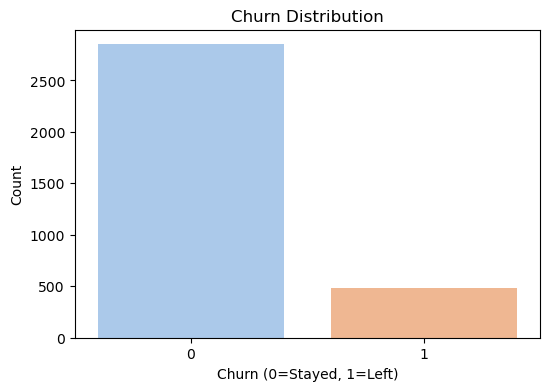

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution counts
churn_counts = data['churn'].value_counts()
print(churn_counts)

# Percentage churn
print("\nChurn rate (%):")
print(round(churn_counts / len(data) * 100, 2))

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=data, palette='pastel')
plt.title("Churn Distribution")
plt.xlabel("Churn (0=Stayed, 1=Left)")
plt.ylabel("Count")
plt.show()


### Interpretation of Churn Distribution

## Target Variable: Churn Distribution

**Total customers:** 3,333  
- **Stayed (0):** 2,850 (~85.5%)  
- **Churned (1):** 483 (~14.5%)  

---
###  What This Means
- The dataset is **imbalanced** — only ~14.5% of customers churned.  
- If we naïvely predict **“no churn” for everyone**, we’d achieve ~85% accuracy.  
  - This shows that **accuracy alone is misleading** in imbalanced datasets.  
---

###  Implications for Modeling
- For a **baseline Logistic Regression** model, we must:  
  - Look **beyond accuracy** → focus on **precision, recall, F1-score, and ROC-AUC**.  
  - Apply **class weights** (`class_weight='balanced'` in sklearn) to give churned customers more importe.  

---

###  Business Insight
- SyriaTel’s churn rate is ~**15%**, which is significant.  
- Retaining even a **small fraction** of these churned customers could translate into **millions in saved revenue**.  

---

### 4.2 Categorical Features vs Churn

Categorical variables like `international plan` and `voice mail plan` can provide strong insights into churn. 

- Customers with **international plans** may churn differently due to higher costs.
- Customers with **voice mail plans** may behave differently depending on usage.

We will compare churn rates across these categorical variables.



=== INTERNATIONAL PLAN ===
Churn distribution (%):
churn                   0      1
international plan              
no                  88.50  11.50
yes                 57.59  42.41


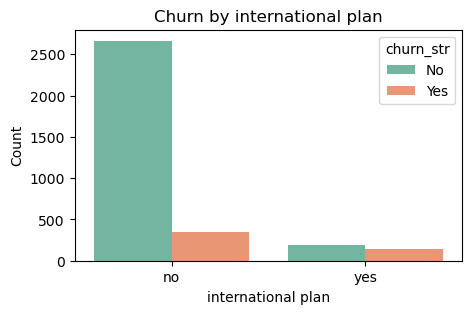

➡ Customers with 'international plan = yes' have the HIGHEST churn rate: 42.4%.
This indicates that this feature is important for predicting churn.


=== VOICE MAIL PLAN ===
Churn distribution (%):
churn                0      1
voice mail plan              
no               83.28  16.72
yes              91.32   8.68


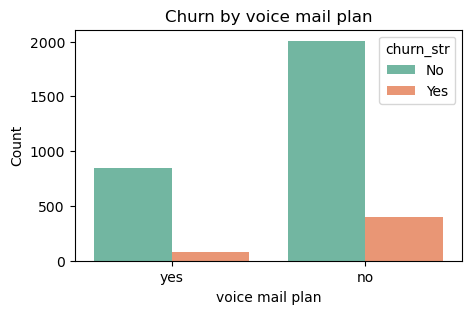

➡ Customers with 'voice mail plan = no' have the HIGHEST churn rate: 16.7%.
This indicates that this feature is important for predicting churn.



In [16]:
cat_features = ['international plan', 'voice mail plan']

# Make churn labels categorical for plotting
data['churn_str'] = data['churn'].map({0: 'No', 1: 'Yes'})

for col in cat_features:
    print(f"\n=== {col.upper()} ===")
    
    # Crosstab (percentage churn by category)
    ct = pd.crosstab(data[col], data['churn'], normalize='index') * 100
    print("Churn distribution (%):")
    print(ct.round(2))
    
    # Plot
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, hue='churn_str', data=data, palette='Set2')
    plt.title(f"Churn by {col}")
    plt.ylabel("Count")
    plt.show()
    
    # Simple text interpretation
    churn_yes = ct[1].sort_values(ascending=False)
    top_group = churn_yes.index[0]
    top_rate = churn_yes.iloc[0]
    
    print(f"➡ Customers with '{col} = {top_group}' have the HIGHEST churn rate: {top_rate:.1f}%.")
    print("This indicates that this feature is important for predicting churn.\n")


Interpretation of Results

International Plan :

Customers without international plan: churn only 11.5%.

Customers with international plan: churn jumps to 42.4%.

- Having an international plan is a major risk factor for churn — possibly due to high costs or dissatisfaction with international call rates.

Voice Mail Plan:

Customers without voice mail plan: churn 16.7%.

Customers with voice mail plan: churn 8.7%.

- Having a voice mail plan is protective against churn, maybe because it adds value or indicates more engaged customers.
  

International plan → increases churn risk significantly.

Voice mail plan → decreases churn risk (loyalty factor).

---

### 4.3 Numeric Features vs Churn

We now analyze numeric features such as:
- Total day minutes, eve minutes, night minutes, intl minutes
- Total day calls, eve calls, night calls, intl calls
- Customer service calls

For each feature we will:
1. Compare the mean values across churn vs non-churn groups.
2. Plot the distributions.
3. Provide an interpretation highlighting whether churners use more/less of the service.



=== TOTAL DAY MINUTES ===
Mean values by churn group:
churn
0    175.18
1    206.91
Name: total day minutes, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


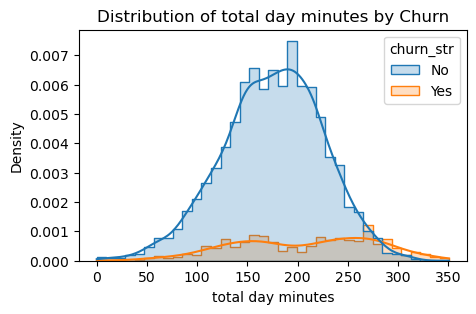

➡ Churners have HIGHER average total day minutes (206.91) compared to non-churners (175.18).

=== TOTAL DAY CALLS ===
Mean values by churn group:
churn
0    100.28
1    101.34
Name: total day calls, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


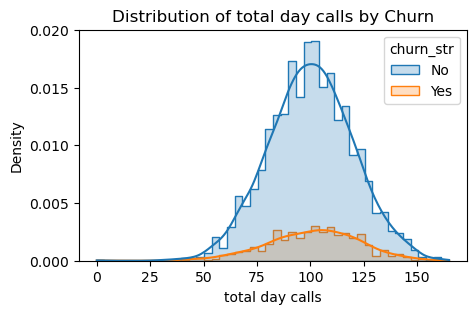

➡ Churners have HIGHER average total day calls (101.34) compared to non-churners (100.28).

=== TOTAL EVE MINUTES ===
Mean values by churn group:
churn
0    199.04
1    212.41
Name: total eve minutes, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


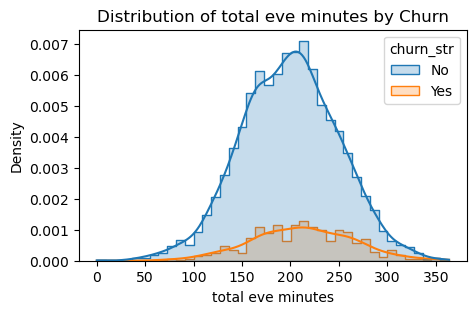

C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


➡ Churners have HIGHER average total eve minutes (212.41) compared to non-churners (199.04).

=== TOTAL EVE CALLS ===
Mean values by churn group:
churn
0    100.04
1    100.56
Name: total eve calls, dtype: float64


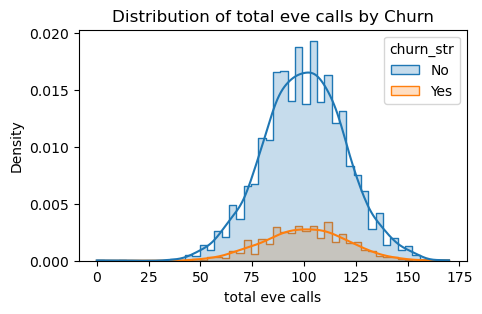

➡ Churners have HIGHER average total eve calls (100.56) compared to non-churners (100.04).

=== TOTAL NIGHT MINUTES ===
Mean values by churn group:
churn
0    200.13
1    205.23
Name: total night minutes, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


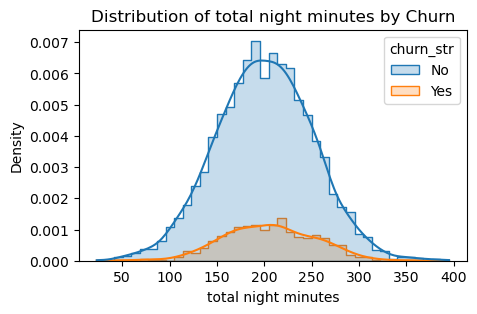

➡ Churners have HIGHER average total night minutes (205.23) compared to non-churners (200.13).

=== TOTAL NIGHT CALLS ===
Mean values by churn group:
churn
0    100.06
1    100.40
Name: total night calls, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


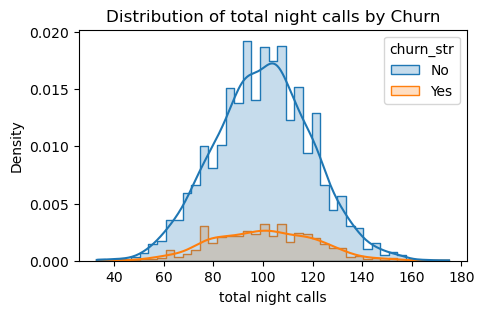

➡ Churners have HIGHER average total night calls (100.4) compared to non-churners (100.06).

=== TOTAL INTL MINUTES ===
Mean values by churn group:
churn
0    10.16
1    10.70
Name: total intl minutes, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


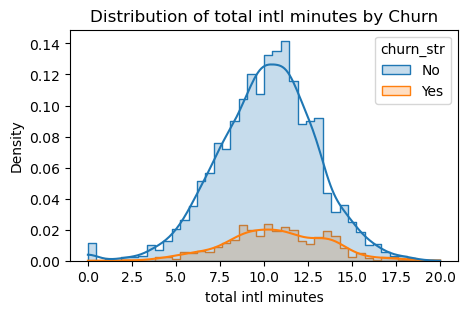

➡ Churners have HIGHER average total intl minutes (10.7) compared to non-churners (10.16).

=== TOTAL INTL CALLS ===
Mean values by churn group:
churn
0    4.53
1    4.16
Name: total intl calls, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


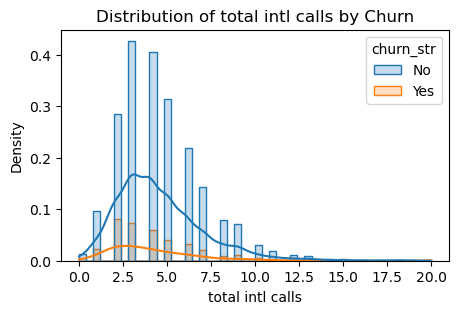

➡ Churners have LOWER average total intl calls (4.16) compared to non-churners (4.53).

=== CUSTOMER SERVICE CALLS ===
Mean values by churn group:
churn
0    1.45
1    2.23
Name: customer service calls, dtype: float64


C:\Users\Michael\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


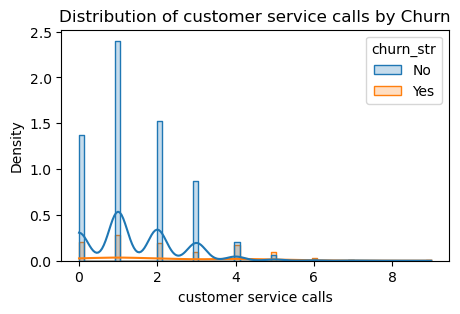

➡ Churners have HIGHER average customer service calls (2.23) compared to non-churners (1.45).


In [18]:
# List of numeric features to analyze
num_features = [
    'total day minutes', 'total day calls',
    'total eve minutes', 'total eve calls',
    'total night minutes', 'total night calls',
    'total intl minutes', 'total intl calls',
    'customer service calls'
]

for col in num_features:
    print(f"\n=== {col.upper()} ===")
    
    # Mean comparison
    means = data.groupby('churn')[col].mean().round(2)
    print("Mean values by churn group:")
    print(means)
    
    # Plot distribution
    plt.figure(figsize=(5,3))
    sns.histplot(data=data, x=col, hue='churn_str', kde=True, element='step', stat='density')
    plt.title(f"Distribution of {col} by Churn")
    plt.show()
    
    # Text interpretation
    churn_val = means[1]
    no_churn_val = means[0]
    
    if churn_val > no_churn_val:
        print(f"➡ Churners have HIGHER average {col} ({churn_val}) compared to non-churners ({no_churn_val}).")
    else:
        print(f"➡ Churners have LOWER average {col} ({churn_val}) compared to non-churners ({no_churn_val}).")


Day usage is a strong churn signal

Churners use more day minutes (206.9 vs 175.2) and slightly more day calls.

 They might face higher bills during the day, leading to dissatisfaction.

Eve & Night usage

Churners also have higher eve minutes (212.4 vs 199.0) and higher night minutes (205.2 vs 200.1).

 Suggests churners are generally heavier users overall.

International usage

Churners use more intl minutes (10.7 vs 10.2) but make fewer intl calls (4.16 vs 4.53).

 They talk longer per call internationally, which might increase costs, contributing to churn.

Customer service calls (very strong indicator)

Churners average 2.23 calls vs non-churners 1.45 calls.

 This is a clear red flag — unhappy customers call more, and are more likely to churn.

---

### Step 4.4: Feature Correlation Analysis

Since the dataset contains categorical features (e.g., *state, area code, international plan, voice mail plan*), 
we first restrict correlation analysis to **numeric columns** only. This avoids conversion errors.


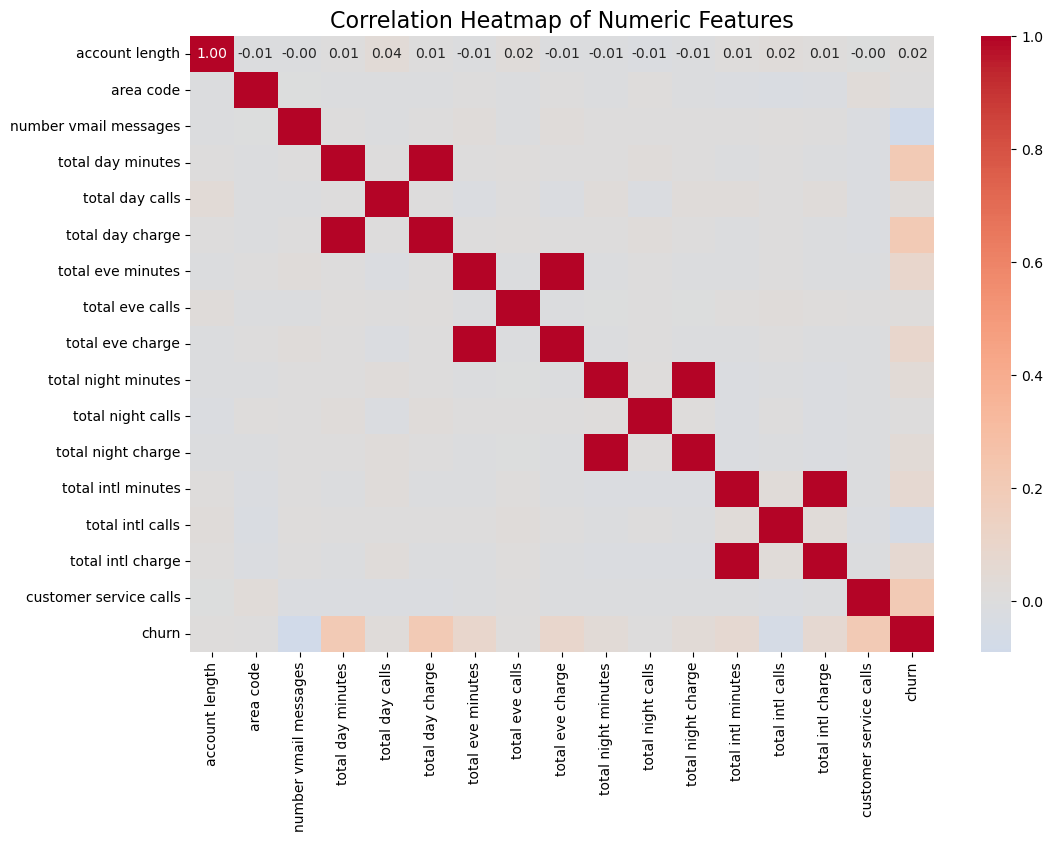

Correlation of Features with Churn:
 churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


In [20]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

# Correlation with churn
corr_with_churn = corr['churn'].sort_values(ascending=False)
print("Correlation of Features with Churn:\n", corr_with_churn)


### Step 4.4: Feature Correlation Analysis

We computed the **Pearson correlations** between all numeric features and the churn variable.  

Key findings:

1. **Strongest Positive Correlations**  
   - `customer service calls` → **0.209**  
   - `total day minutes` / `total day charge` → **0.205**  
    Customers who call support more often or use more day minutes are more likely to churn.  

2. **Moderate Positive Correlations**  
   - `total eve minutes` / `total eve charge` → **~0.093**  
   - `intl minutes` / `intl charge` → **~0.068**  
    Heavier usage (especially international calls) increases churn probability, though not as strongly.  

3. **Weak/Negligible Correlations**  
   - `night minutes/charge`, `day calls`, `account length`, `area code`, etc. → **< 0.04**  
    These features have little direct relationship with churn.  

4. **Negative Correlations**  
   - `intl calls` → **-0.053**  
   - `number vmail messages` → **-0.090**  
    More international calls and more voicemail messages are slightly associated with **lower churn**.  

 **Overall takeaway:**  
- The most important signals of churn are

---


## Step 5: Data Preprocessing

1. **Removed redundant features**  
   - Dropped all `charge` columns since they are perfectly correlated with `minutes`.

2. **Encoded categorical variables**  
   - Converted `international plan` and `voice mail plan` into binary (0/1).  
   - One-hot encoded `area code`.  
   - Dropped `state` as it’s not predictive of churn.

3. **Train-test split**  
   - 70% training, 30% testing with stratified sampling to preserve churn ratio.

4. **Feature scaling**  
   - Applied `StandardScaler` to standardize numerical variables for stable Logistic Regression coefficients.

 At this stage, the dataset is **clean and ready for model building**.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# Drop irrelevant / non-numeric categorical columns
X = df.drop(columns=['churn', 'phone number', 'state'])

# Encode yes/no categorical variables
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encode area code
X = pd.get_dummies(X, columns=['area code'], drop_first=True)

# Target variable
y = df['churn']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Evaluation Results:
Accuracy: 0.8591
Precision: 0.5349
Recall: 0.2371
F1-Score: 0.3286

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



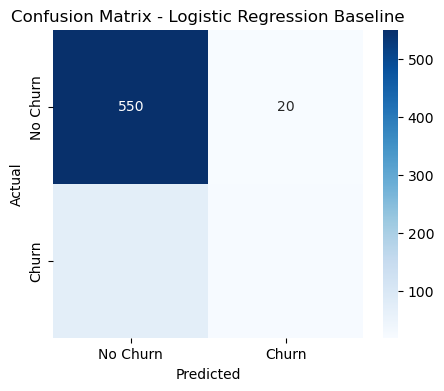


Top Features influencing churn:
customer service calls    0.737438
international plan        0.594001
number vmail messages     0.540915
total day charge          0.332367
total day minutes         0.331789
total eve charge          0.187892
total eve minutes         0.186450
total intl charge         0.143708
total intl minutes        0.105315
total day calls           0.071999
dtype: float64

Features reducing churn likelihood:
voice mail plan       -0.944316
total intl calls      -0.234161
area code_510         -0.027645
area code_415          0.006359
total night calls      0.006444
account length         0.037984
total eve calls        0.048643
total night minutes    0.061012
total night charge     0.071605
total day calls        0.071999
dtype: float64


In [30]:
# Logistic Regression Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Baseline')
plt.show()

# Feature Importance (coefficients)
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns)
print("\nTop Features influencing churn:")
print(feature_importance.sort_values(ascending=False).head(10))
print("\nFeatures reducing churn likelihood:")
print(feature_importance.sort_values().head(10))


# Step 5: Baseline Model – Logistic Regression

## Interpretation

- The model achieves **high overall accuracy (85.9%)**, but this is **misleading** because the dataset is **imbalanced** (only ~14.5% churn).  
- For the churned customers, **recall is low (23.7%)** → the model is **missing most of the customers who actually churned**.  
- **Precision = 53.5%** → when the model predicts churn, it’s correct only about half the time.  
- **F1-Score = 32.9%** → confirms the model **struggles to capture churners**.  

 **Business takeaway:** If used in production, this model would wrongly classify many churned customers as “safe,” which could be **very costly** for SyriaTel.

---

## Feature Importance

Logistic Regression gives us insight into which features **increase** or **decrease** the likelihood of churn.

### Features **increasing churn likelihood**:
- **Customer service calls (+0.74)** → Frequent support calls strongly signal churn.  
- **International plan (+0.59)** → Customers with this plan are more likely to churn.  
- **Number of voicemail messages (+0.54)** → Could reflect dissatisfaction with voicemail services.  
- **Day charges/minutes (+0.33)** → Heavy daytime usage is linked to churn.  
- **Evening charges/minutes (+0.19)** → Moderate impact on churn.  

### Features **reducing churn likelihood**:
- **Voicemail plan (−0.94)** → Strongly reduces churn.  
- **More international calls (−0.23)** → Surprisingly, heavier international calling reduces churn risk.  
- **Account length (−0.04)** → Longer-tenured customers churn slightly less.  
- **Night usage (calls, minutes, charge)** → Weak but slightly negative correlation with churn.  

---

## Key Insights

- **Accuracy is deceptive** → Precision and recall are more important for churn prediction.  
- **Customer service calls = biggest red flag** → Customers calling often likely have unresolved issues.  
- **Plans matter** → The **International plan increases churn risk**, while the **Voicemail plan protects against churn**.  
- **Usage patterns** → High **day-time usage** drives churn, but heavy **night-time usage does not**.  


# Baseline Model Results – Logistic Regression (SyriaTel Dataset)

## 🔹 Model Evaluation Metrics
- **Accuracy**: 0.8591  
- **Precision**: 0.5349  
- **Recall**: 0.2371  
- **F1-Score**: 0.3286  

### Classification Report
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| No Churn (False) | 0.88 | 0.96 | 0.92 | 570 |
| Churn (True)     | 0.53 | 0.24 | 0.33 | 97  |
| **Overall Accuracy** | | | **0.86** | 667 |

---

## Interpretation of Results
- The model correctly classifies **85.9% of all customers** in the test set.  
- However, performance is **uneven across classes**:  
  - For **non-churners**, recall is **96%** (most “safe” customers are correctly identified).  
  - For **churners**, recall is only **24%** (the majority of actual churners are not detected).  
- Precision for churn prediction is **53.5%**, meaning just over half of predicted churners are truly churners.  
- The **F1-Score for churners is 0.33**, confirming weak predictive performance for the minority class.  

---

## Feature Importance (Top Coefficients from Logistic Regression)

### Features with **positive coefficients** (increase likelihood of churn):
| Feature | Coefficient |
|---------|-------------|
| Customer service calls | +0.7374 |
| International plan     | +0.5940 |
| Number vmail messages  | +0.5409 |
| Total day charge       | +0.3324 |
| Total day minutes      | +0.3318 |
| Total eve charge       | +0.1879 |
| Total eve minutes      | +0.1865 |
| Total intl charge      | +0.1437 |
| Total intl minutes     | +0.1053 |
| Total day calls        | +0.0720 |

### Features with **negative coefficients** (reduce likelihood of churn):
| Feature | Coefficient |
|---------|-------------|
| Voice mail plan       | −0.9443 |
| Total intl calls      | −0.2342 |
| Area code_510         | −0.0276 |
| Area code_415         | +0.0064 |
| Total night calls     | +0.0064 |
| Account length        | +0.0380 |
| Total eve calls       | +0.0486 |
| Total night minutes   | +0.0610 |
| Total night charge    | +0.0716 |
| Total day calls       | +0.0720 |

*(Note: Coefficients are model outputs. Positive values increase predicted churn probability; negative values decrease it.)*

---

## Key Observations
- The dataset is **imbalanced**: only **97 churners out of 667 test samples (~14.5%)**.  
- The model is much better at predicting **non-churners** (high recall 96%) than **churners** (recall 24%).  
- **Customer service calls** and **having an international plan** are the strongest churn predictors (positive coefficients).  
- **Having a voice mail plan** strongly reduces churn probability (largest negative coefficient).  
- **Usage features** (day, evening, international charges/minutes) also contribute, but with smaller weights.  

---
